In [6]:
pip install matplotlib graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz

# Load data
data = pd.read_csv(r'C:\Users\suyog\Downloads\task 3\Churn_Modelling.csv')

data.dropna(inplace=True)

le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])


X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)

# Evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Logistic Regression evaluation
acc_log_reg, prec_log_reg, rec_log_reg, f1_log_reg = evaluate_model(y_test, y_pred_log_reg)
print(f'Logistic Regression - Accuracy: {acc_log_reg}, Precision: {prec_log_reg}, Recall: {rec_log_reg}, F1 Score: {f1_log_reg}')

# Random Forest evaluation
acc_rf, prec_rf, rec_rf, f1_rf = evaluate_model(y_test, y_pred_rf)
print(f'Random Forest - Accuracy: {acc_rf}, Precision: {prec_rf}, Recall: {rec_rf}, F1 Score: {f1_rf}')

# Gradient Boosting evaluation
acc_gb, prec_gb, rec_gb, f1_gb = evaluate_model(y_test, y_pred_gb)
print(f'Gradient Boosting - Accuracy: {acc_gb}, Precision: {prec_gb}, Recall: {rec_gb}, F1 Score: {f1_gb}')


Logistic Regression - Accuracy: 0.815, Precision: 0.5966386554621849, Recall: 0.1806615776081425, F1 Score: 0.27734375
Random Forest - Accuracy: 0.864, Precision: 0.746938775510204, Recall: 0.46564885496183206, F1 Score: 0.5736677115987462
Gradient Boosting - Accuracy: 0.8655, Precision: 0.7540983606557377, Recall: 0.4681933842239186, F1 Score: 0.5777080062794349


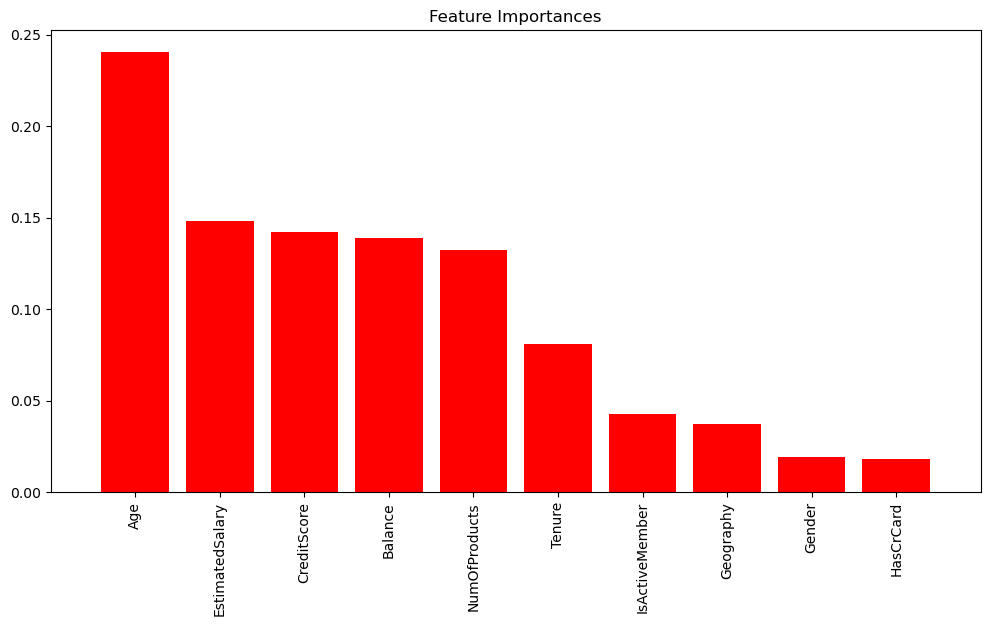

In [8]:

importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), data.columns[3:-1][indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
